In [9]:
import numpy as np
import scipy as sp
import pandas as pd
import xlrd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('data.xlsx')
df.head()

,Date,Time,Location,Secchi depth (ft.in),Secchi Depth (ft),Turbidity (NTU),wind,sun,chop,approximate temp (F),observer,Secchi Depth (in)
0,2017-05-29,12:15:00,Ss1,6.1,6.083333,NaN,Moderate breeze,bright,choppy,65.0,NaN,73.0
1,2017-05-29,12:15:00,Ss1,7.2,7.166667,NaN,Moderate breeze,bright,choppy,65.0,NaN,86.0
2,2017-05-29,12:15:00,Ss1,6.6,6.500000,NaN,Moderate breeze,bright,choppy,65.0,NaN,78.0
3,2017-05-29,12:15:00,Ss1,6.6,6.500000,NaN,Moderate breeze,bright,choppy,65.0,NaN,78.0
4,2017-05-29,12:50:00,Ss2,6.1,6.083333,NaN,Moderate breeze,bright,choppy,65.0,NaN,73.0


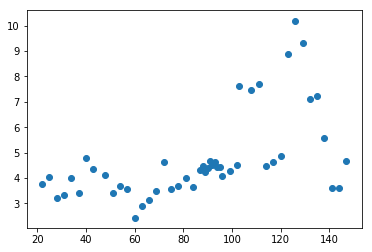

In [11]:
turb = df['Turbidity (NTU)']
x = range(len(turb))
plt.scatter(x, turb)
plt.show()

In [12]:
# drop columns that are not useful
# eg observer
df = df.drop('observer', axis=1)


In [14]:
print set(df['Location'])

set([u'ss1', u'ss2', u'Ss1', u'ssc', u'Ss2'])


In [17]:
# convert catacorical clumns to numerical catagories
# location, wind, chop, 
# assumes Ss1 ans SS1 are different locations

new_df = pd.get_dummies(df, columns = ['Location', 'wind', 'sun', 'chop'])
new_df.head()

,Date,Time,Secchi depth (ft.in),Secchi Depth (ft),Turbidity (NTU),approximate temp (F),Secchi Depth (in),Location_Ss1,Location_Ss2,Location_ss1,...,sun_bright,sun_bright,sun_cloudy,sun_partly cloudy,sun_raining,sun_sunny,chop_calm,chop_choppy,chop_mild,chop_slight
0,2017-05-29,12:15:00,6.1,6.083333,NaN,65.0,73.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,2017-05-29,12:15:00,7.2,7.166667,NaN,65.0,86.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2017-05-29,12:15:00,6.6,6.500000,NaN,65.0,78.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,2017-05-29,12:15:00,6.6,6.500000,NaN,65.0,78.0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,2017-05-29,12:50:00,6.1,6.083333,NaN,65.0,73.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [31]:
# clean turbidity value NaN
# use 0 instead of NaN to allow clusterinng
new_df = new_df.fillna(0)

In [32]:
# group by location and plot together
# cluster based on all other values
# plot the turbidity
#print new_df['Turbidity (NTU)']

drop_date_time_df = new_df.drop(['Date', 'Time'], axis=1)
drop_date_time_df.head()

,Secchi depth (ft.in),Secchi Depth (ft),Turbidity (NTU),approximate temp (F),Secchi Depth (in),Location_Ss1,Location_Ss2,Location_ss1,Location_ss2,Location_ssc,...,sun_bright,sun_bright,sun_cloudy,sun_partly cloudy,sun_raining,sun_sunny,chop_calm,chop_choppy,chop_mild,chop_slight
0,6.1,6.083333,0.0,65.0,73.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,7.2,7.166667,0.0,65.0,86.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,6.6,6.500000,0.0,65.0,78.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,6.6,6.500000,0.0,65.0,78.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,6.1,6.083333,0.0,65.0,73.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [34]:
# cant use turbidity for clustering as it is our parameter of  interest
cluster_df  = drop_date_time_df.drop(['Turbidity (NTU)'], axis=1)
X = cluster_df.as_matrix()

In [39]:
def plot_clusters(labels, x, param):

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    print len(colors)
    print len(X)

    cols = []
    for i in range(len(X)):
        cols.append(colors[labels[i]])
        
    plt.scatter(x,param, c = cols)
    plt.show()

### Trying Kmeans clustering with various n_clusters values

2
2
150


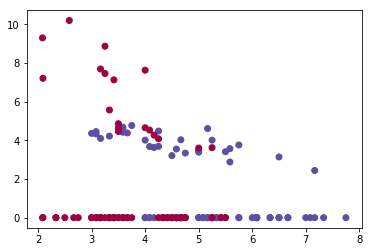

In [46]:
km = KMeans(n_clusters = 2)
labels = km.fit_predict(X)
print len(set(labels))
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb)

3
3
150


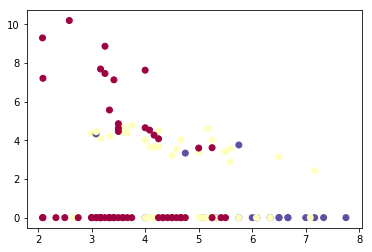

In [47]:
km = KMeans(n_clusters = 3)
labels = km.fit_predict(X)
print len(set(labels))
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb) # plottiing x-axis = depth, y-axis=turbidity, color = cluster

4
4
150


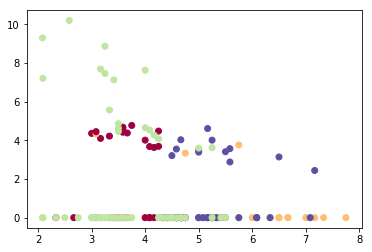

In [49]:
km = KMeans(n_clusters = 4)
labels = km.fit_predict(X)
print len(set(labels))
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb) # plottiing x-axis = depth, y-axis=turbidity, color = cluster

6
6
150


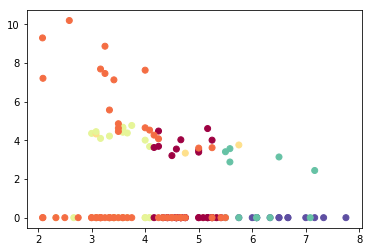

In [50]:
km = KMeans(n_clusters = 6)
labels = km.fit_predict(X)
print len(set(labels))
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb) # plottiing x-axis = depth, y-axis=turbidity, color = cluster

### Trying DBSCAN clustering using various values of eps and min_samples, using hamming distance

4
150


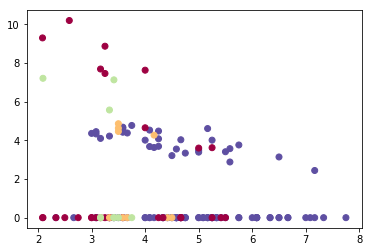

In [66]:
dbscan = DBSCAN(eps = 0.1, min_samples=5, metric='hamming')
labels = dbscan.fit_predict(X)
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb)

2
150


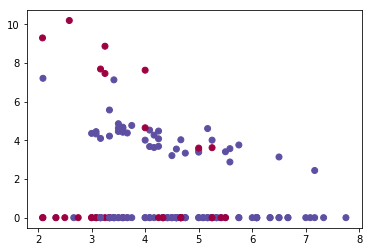

In [67]:
dbscan = DBSCAN(eps = 0.1, min_samples=7, metric='hamming')
labels = dbscan.fit_predict(X)
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb)

2
150


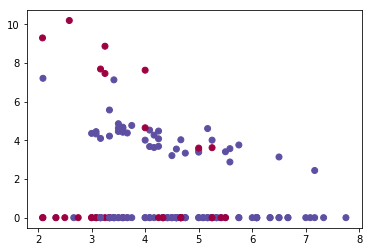

In [68]:
dbscan = DBSCAN(eps = 0.1, min_samples=10, metric='hamming')
labels = dbscan.fit_predict(X)
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb)

4
150


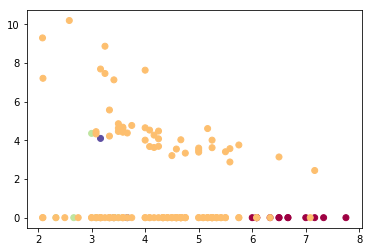

In [70]:
dbscan = DBSCAN(eps = 0.2, min_samples=5, metric='hamming')
labels = dbscan.fit_predict(X)
turb = drop_date_time_df['Turbidity (NTU)']
plot_clusters(labels, X[:,1], turb)